In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'cm',                                                                  
}
rcParams.update(config)

ModuleNotFoundError: No module named 'seaborn'

[71.60000000000001, 82.14285714285714, 79.27272727272727, 70.25, 68.66666666666667, 79.75, 71.60000000000001]


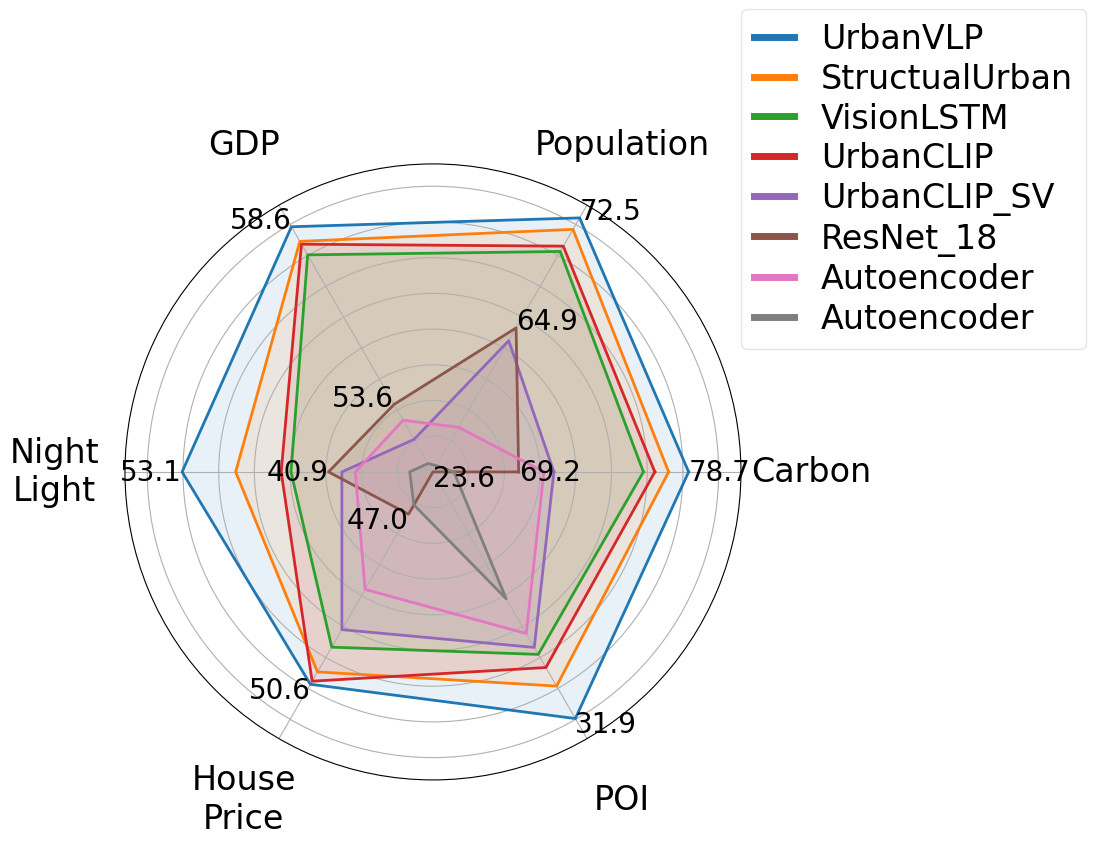

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# 'ours':np.array([0.716,0.593,0.310,0.457,0.413]),
# 'StructualUrban':np.array([0.677,0.548,0.305,0.412,0.387]),
# 'VisionLSTM':np.array([0.568,0.521,0.304,0.355,0.247]),
# 'UrbanCLIP_SV':np.array([0.574,0.402,0.315,0.276,0.243]),
# 'UrbanCLIP':np.array([0.671,0.536,0.326,0.387,0.269]),
# 'PG-SimCLR':np.array([0.270,0.288,0.270,0.228,0.0]),
# 'ResNet-18':np.array([0.243,0.274,0.241,0.202,0.221]),
# 'Autoencoder':np.array([0.230,0.166,0.197,0.164,0.186])     

# Your provided values
UrbanVLP =       [78.7, 72.5, 58.6, 53.1, 50.6, 31.9]
StructualUrban = [74.5, 69.9, 56.0, 47.1, 49.4, 27.7]
VisionLSTM =     [69.2, 64.9, 53.6, 40.9, 47.0, 23.6]
UrbanCLIP =      [71.6, 66.1, 55.5, 42.0, 50.3, 25.3]
UrbanCLIP_SV =   [50.4, 44.7, 20.8, 35.2, 45.3, 22.7]
PG_SimCLR =      [43.0, 47.6, 27.0, 36.7, 34.1, 0.0]
ResNet_18 =      [48.3, 25.1, 24.2, 33.7, 41.4, 20.9]
Autoencoder =    [29.4, 16.4, 16.5, 27.6, 33.2, 16.4]

# Scales for each metric
scales = [
    [25, 100],  # Scale for A
    [15, 85],   # Scale for B
    [15, 70],  # Scale for C
    [25, 65],  # Scale for D
    [30, 60],  # Scale for E
    [0, 40], # Scale for F
]

# Normalize the data
normalized_model_1 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanVLP, scales)]
normalized_model_2 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(StructualUrban, scales)]
normalized_model_3 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(VisionLSTM, scales)]
normalized_model_4 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP, scales)]
normalized_model_5 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP_SV, scales)]
normalized_model_6 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(PG_SimCLR, scales)]
normalized_model_7 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(ResNet_18, scales)]
normalized_model_8 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(Autoencoder, scales)]



# The plot is circular, so we need to "complete the loop" and append the start value to the end.
normalized_model_1 += normalized_model_1[:1]
normalized_model_2 += normalized_model_2[:1]
normalized_model_3 += normalized_model_3[:1]
normalized_model_4 += normalized_model_4[:1]
normalized_model_5 += normalized_model_5[:1]
normalized_model_6 += normalized_model_6[:1]
normalized_model_7 += normalized_model_7[:1]
normalized_model_8 += normalized_model_8[:1]


# Initialise the spider plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Labels for each variable
labels = ['Carbon', 'Population', 'GDP', 'Night\nLight', 'House\nPrice', 'POI']

# Number of variables
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# We need to "complete the loop" and append the start value to the end.
angles += angles[:1]


# Plot data for each model
ax.plot(angles, normalized_model_1, linewidth=2, linestyle='solid', label='UrbanVLP')
ax.fill(angles, normalized_model_1, alpha=0.1)

ax.plot(angles, normalized_model_2, linewidth=2, linestyle='solid', label='StructualUrban')
ax.fill(angles, normalized_model_2, alpha=0.1)

ax.plot(angles, normalized_model_3, linewidth=2, linestyle='solid', label='VisionLSTM')
ax.fill(angles, normalized_model_3, alpha=0.1)

ax.plot(angles, normalized_model_4, linewidth=2, linestyle='solid', label='UrbanCLIP')
ax.fill(angles, normalized_model_4, alpha=0.1)

ax.plot(angles, normalized_model_5, linewidth=2, linestyle='solid', label='UrbanCLIP_SV')
ax.fill(angles, normalized_model_5, alpha=0.1)

ax.plot(angles, normalized_model_6, linewidth=2, linestyle='solid', label='ResNet_18')
ax.fill(angles, normalized_model_6, alpha=0.1)

ax.plot(angles, normalized_model_7, linewidth=2, linestyle='solid', label='Autoencoder')
ax.fill(angles, normalized_model_7, alpha=0.1)

ax.plot(angles, normalized_model_8, linewidth=2, linestyle='solid', label='Autoencoder')
ax.fill(angles, normalized_model_8, alpha=0.1)

# Correcting the tick settings

plt.xticks(angles[:-1], labels,  fontsize=24)

ax.tick_params(axis='x', pad=40)

ax.set_yticklabels([])

# Annotate data points
for i, (value1, value2, value3, value4, value5, value6, value7, value8) in enumerate(zip(UrbanVLP, StructualUrban, VisionLSTM, UrbanCLIP, UrbanCLIP_SV, PG_SimCLR, ResNet_18, Autoencoder)):
    angle_rad = angles[i]

    # Adjusting text alignment and position based on angle
    alignment = "center"
    if angle_rad > np.pi/2 and angle_rad < 3*np.pi/2:
        alignment = "right"
    elif angle_rad < np.pi/2 or angle_rad > 3*np.pi/2:
        alignment = "left"

    xytext = (0*np.cos(angle_rad), 5*np.sin(angle_rad))  # Dynamically set text position

    ax.annotate(value1, xy=(angle_rad, normalized_model_1[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=20)
    # ax.annotate(value2, xy=(angle_rad, normalized_model_2[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_3[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_4[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_5[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center", fontsize=16)
    ax.annotate(value3, xy=(angle_rad, normalized_model_6[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=20)
    # ax.annotate(value3, xy=(angle_rad, normalized_model_7[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_8[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")

# Add a legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1),fontsize=20)
# plt.legend(fontsize=24, loc = (1.2, 0.7), labelspacing=0.2, borderpad=0.15, framealpha=0.5, handlelength=1.2)


legend = plt.legend(fontsize=24, loc=(1.0, 0.7), labelspacing=0.2, borderpad=0.4, framealpha=0.5, handlelength=1.2)

# 获取图例线条
legend_lines = legend.get_lines()

# 调整图例线条的粗细
for line in legend_lines:
    line.set_linewidth(5.0)  # 您可以根据需要调整粗细

# Show the plot
# plt.show()
plt.savefig('radar2.pdf', dpi=800, bbox_inches='tight')
plt.show()

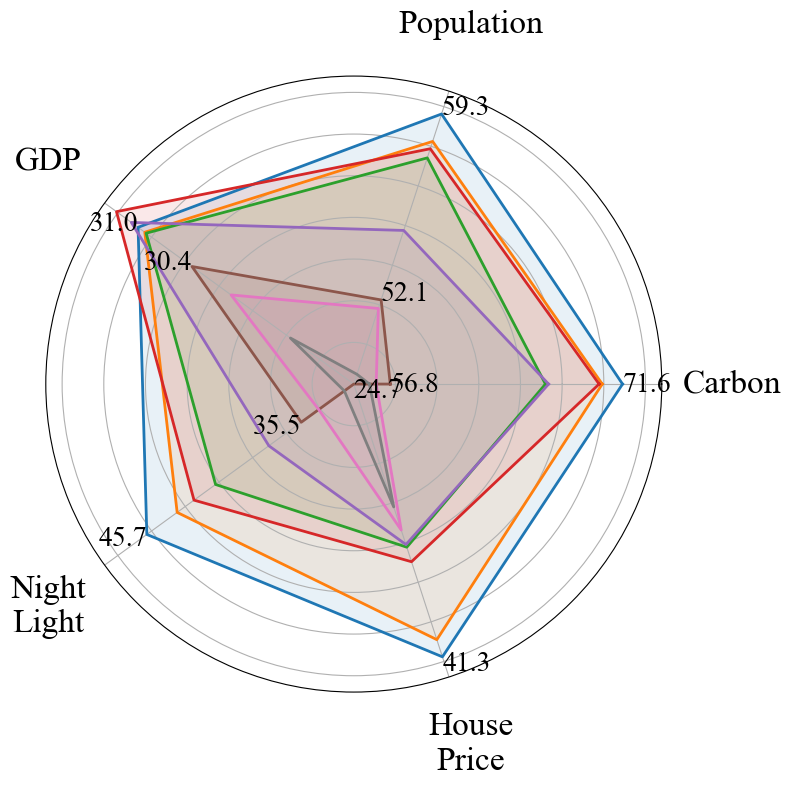

In [50]:
import matplotlib.pyplot as plt
import numpy as np


# 'ours':np.array([]),
# 'StructualUrban':np.array([]),
# 'VisionLSTM':np.array([]),
# 'UrbanCLIP_SV':np.array([]),
# 'UrbanCLIP':np.array([]),
# 'PG-SimCLR':np.array([]),
# 'ResNet-18':np.array([]),
# 'Autoencoder':np.array([])     

# Your provided values
UrbanVLP =       [71.6, 59.3, 31.0, 45.7, 41.3]
StructualUrban = [67.7, 54.8, 30.5, 41.2, 38.7]
VisionLSTM =     [56.8, 52.1, 30.4, 35.5, 24.7]
UrbanCLIP =      [67.1, 53.6, 32.6, 38.7, 26.9]
UrbanCLIP_SV =   [57.4, 40.2, 31.5, 27.6, 24.3]
PG_SimCLR =      [27.0, 28.8, 27.0, 22.8, 0.0]
ResNet_18 =      [24.3, 27.4, 24.1, 20.2, 22.1]
Autoencoder =    [23.0, 16.6, 19.7, 16.4, 18.6]

# Scales for each metric
scales = [
    [20, 100],  # Scale for A
    [15, 80],   # Scale for B
    [15, 40],  # Scale for C
    [15, 65],  # Scale for D
    [0, 60], # Scale for F
]

# Normalize the data
normalized_model_1 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanVLP, scales)]
normalized_model_2 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(StructualUrban, scales)]
normalized_model_3 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(VisionLSTM, scales)]
normalized_model_4 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP, scales)]
normalized_model_5 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP_SV, scales)]
normalized_model_6 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(PG_SimCLR, scales)]
normalized_model_7 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(ResNet_18, scales)]
normalized_model_8 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(Autoencoder, scales)]

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
normalized_model_1 += normalized_model_1[:1]
normalized_model_2 += normalized_model_2[:1]
normalized_model_3 += normalized_model_3[:1]
normalized_model_4 += normalized_model_4[:1]
normalized_model_5 += normalized_model_5[:1]
normalized_model_6 += normalized_model_6[:1]
normalized_model_7 += normalized_model_7[:1]
normalized_model_8 += normalized_model_8[:1]


# Initialise the spider plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Labels for each variable
labels = ['Carbon', 'Population', 'GDP', 'Night\nLight', 'House\nPrice']

# Number of variables
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# We need to "complete the loop" and append the start value to the end.
angles += angles[:1]


# Plot data for each model
ax.plot(angles, normalized_model_1, linewidth=2, linestyle='solid', label='UrbanVLP')
ax.fill(angles, normalized_model_1, alpha=0.1)

ax.plot(angles, normalized_model_2, linewidth=2, linestyle='solid', label='StructualUrban')
ax.fill(angles, normalized_model_2, alpha=0.1)

ax.plot(angles, normalized_model_3, linewidth=2, linestyle='solid', label='VisionLSTM')
ax.fill(angles, normalized_model_3, alpha=0.1)

ax.plot(angles, normalized_model_4, linewidth=2, linestyle='solid', label='UrbanCLIP')
ax.fill(angles, normalized_model_4, alpha=0.1)

ax.plot(angles, normalized_model_5, linewidth=2, linestyle='solid', label='UrbanCLIP_SV')
ax.fill(angles, normalized_model_5, alpha=0.1)

ax.plot(angles, normalized_model_6, linewidth=2, linestyle='solid', label='ResNet_18')
ax.fill(angles, normalized_model_6, alpha=0.1)

ax.plot(angles, normalized_model_7, linewidth=2, linestyle='solid', label='Autoencoder')
ax.fill(angles, normalized_model_7, alpha=0.1)

ax.plot(angles, normalized_model_8, linewidth=2, linestyle='solid', label='Autoencoder')
ax.fill(angles, normalized_model_8, alpha=0.1)

# Correcting the tick settings

plt.xticks(angles[:-1], labels,  fontsize=24)

ax.tick_params(axis='x', pad=40)

ax.set_yticklabels([])

# Annotate data points
for i, (value1, value2, value3, value4, value5, value6, value7, value8) in enumerate(zip(UrbanVLP, StructualUrban, VisionLSTM, UrbanCLIP, UrbanCLIP_SV, PG_SimCLR, ResNet_18, Autoencoder)):
    angle_rad = angles[i]

    # Adjusting text alignment and position based on angle
    alignment = "center"
    if angle_rad > np.pi/2 and angle_rad < 3*np.pi/2:
        alignment = "right"
    elif angle_rad < np.pi/2 or angle_rad > 3*np.pi/2:
        alignment = "left"

    xytext = (0*np.cos(angle_rad), 5*np.sin(angle_rad))  # Dynamically set text position

    ax.annotate(value1, xy=(angle_rad, normalized_model_1[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=20)
    # ax.annotate(value2, xy=(angle_rad, normalized_model_2[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_3[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_4[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_5[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center", fontsize=16)
    ax.annotate(value3, xy=(angle_rad, normalized_model_6[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=20)
    # ax.annotate(value3, xy=(angle_rad, normalized_model_7[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_8[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")

# Add a legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1),fontsize=20)
# plt.legend(fontsize=24, loc = (1.2, 0.7), labelspacing=0.2, borderpad=0.15, framealpha=0.5, handlelength=1.2)

# legend = plt.legend(fontsize=24, loc=(1.2, 0.7), labelspacing=0.2, borderpad=0.4, framealpha=0.5, handlelength=1.2)

# # 获取图例线条
# legend_lines = legend.get_lines()

# # 调整图例线条的粗细
# for line in legend_lines:
#     line.set_linewidth(5.0)  # 您可以根据需要调整粗细

# Show the plot
# plt.show()
plt.savefig('radar1.pdf', dpi=800, bbox_inches='tight')
plt.show()

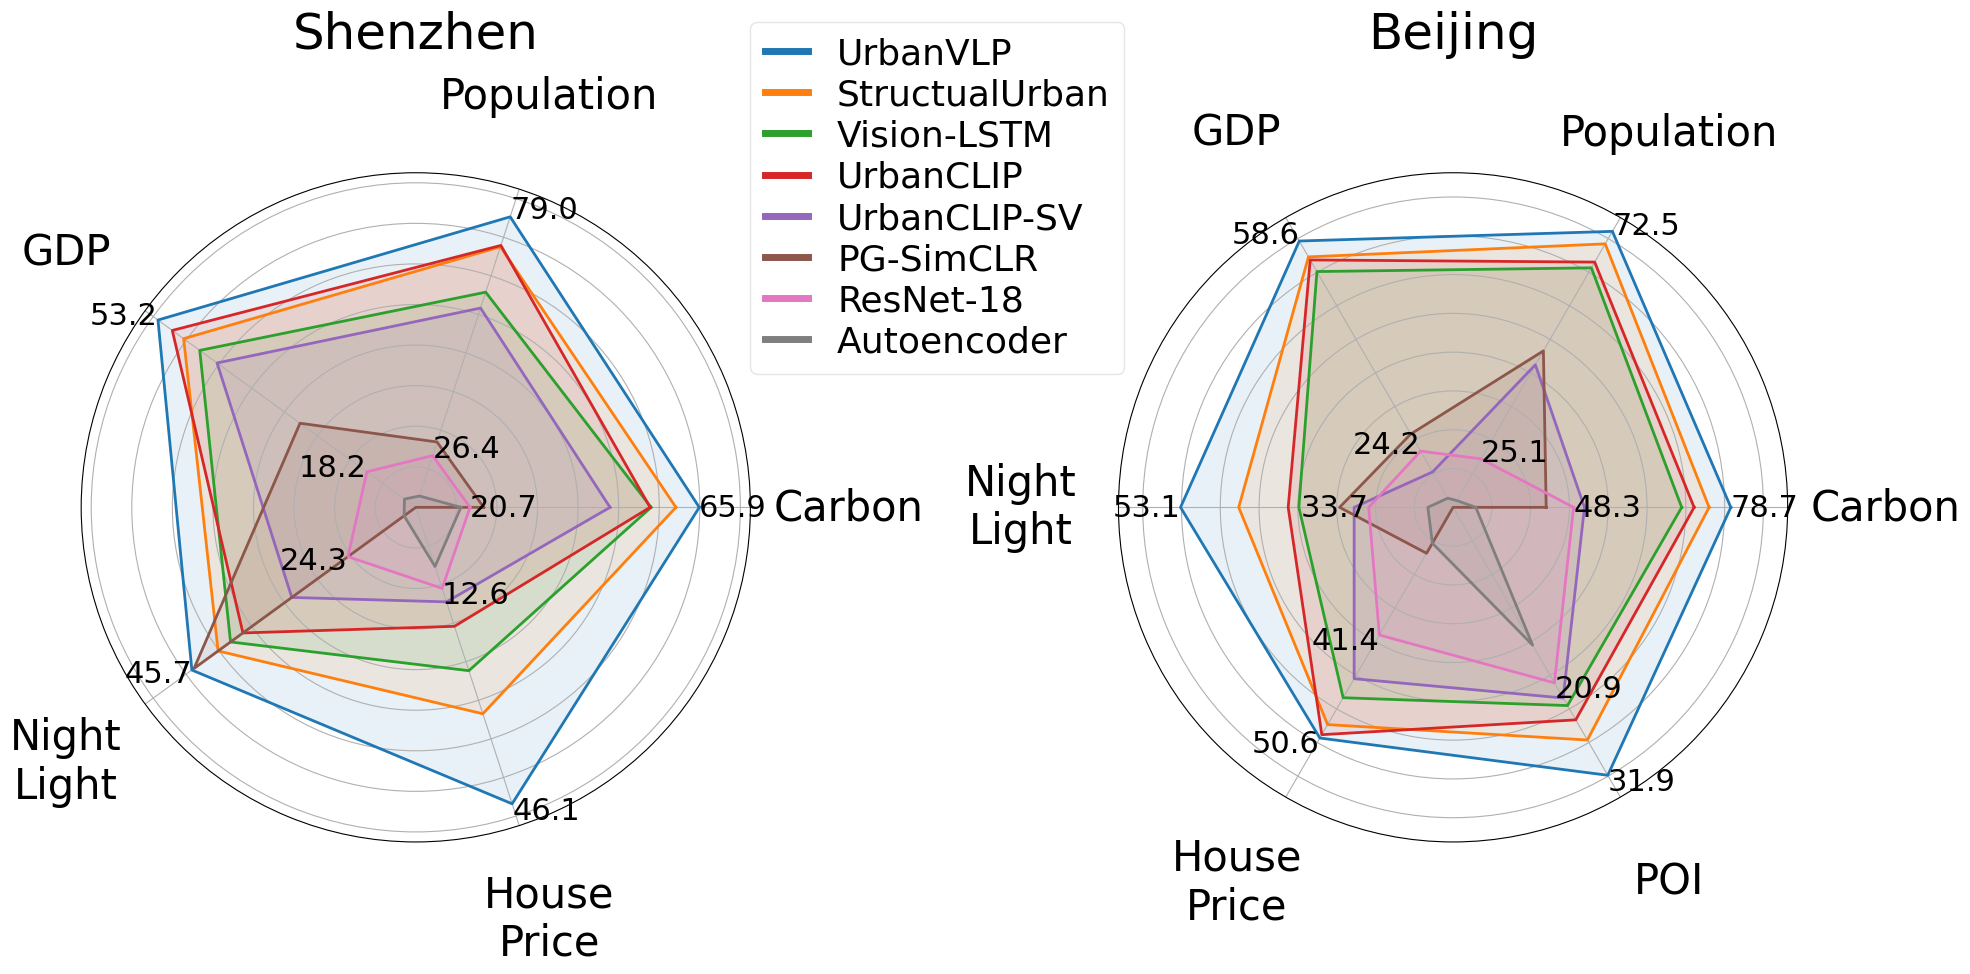

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 'ours':np.array([0.716,0.593,0.310,0.457,0.413]),
# 'StructualUrban':np.array([0.677,0.548,0.305,0.412,0.387]),
# 'VisionLSTM':np.array([0.568,0.521,0.304,0.355,0.247]),
# 'UrbanCLIP_SV':np.array([0.574,0.402,0.315,0.276,0.243]),
# 'UrbanCLIP':np.array([0.671,0.536,0.326,0.387,0.269]),
# 'PG-SimCLR':np.array([0.270,0.288,0.270,0.228,0.0]),
# 'ResNet-18':np.array([0.243,0.274,0.241,0.202,0.221]),
# 'Autoencoder':np.array([0.230,0.166,0.197,0.164,0.186])     


UrbanVLP =       [65.9, 79.0, 53.2, 45.7, 46.1]
StructualUrban = [61.3, 72.4, 48.9, 42.1, 32.1]
VisionLSTM =     [56.4, 62.4, 46.2, 40.4, 25.4]
UrbanCLIP =      [56.2, 72.7, 50.8, 38.7, 18.5]
UrbanCLIP_SV =   [48.3, 58.9, 43.3, 32.0, 14.7]
PG_SimCLR =      [23.4, 29.4, 29.4, 45.4, 0.0]
ResNet_18 =      [20.7, 26.4, 18.2, 24.3, 12.6]
Autoencoder =    [18.9, 17.5, 11.9, 16.6, 9.2]

# Scales for each metric
scales = [
    [10, 90],  # Scale for A
    [15, 100],   # Scale for B
    [10, 65],  # Scale for C
    [15, 60],  # Scale for D
    [0, 60], # Scale for F
]

# Normalize the data
normalized_model_1 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanVLP, scales)]
normalized_model_2 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(StructualUrban, scales)]
normalized_model_3 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(VisionLSTM, scales)]
normalized_model_4 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP, scales)]
normalized_model_5 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP_SV, scales)]
normalized_model_6 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(PG_SimCLR, scales)]
normalized_model_7 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(ResNet_18, scales)]
normalized_model_8 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(Autoencoder, scales)]

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
normalized_model_1 += normalized_model_1[:1]
normalized_model_2 += normalized_model_2[:1]
normalized_model_3 += normalized_model_3[:1]
normalized_model_4 += normalized_model_4[:1]
normalized_model_5 += normalized_model_5[:1]
normalized_model_6 += normalized_model_6[:1]
normalized_model_7 += normalized_model_7[:1]
normalized_model_8 += normalized_model_8[:1]

# Labels for each variable
labels = ['Carbon', 'Population', 'GDP', 'Night\nLight', 'House\nPrice']

# Number of variables
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# We need to "complete the loop" and append the start value to the end.
angles += angles[:1]


# Initialise the spider plot
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
fig, ax = plt.subplots(1, 2, figsize=(18, 20), subplot_kw=dict(polar=True))
fig.tight_layout(h_pad=20)



ax[0].set_title('Shenzhen', fontsize=36, pad=20)

# Plot data for each model
ax[0].plot(angles, normalized_model_1, linewidth=2, linestyle='solid', label='UrbanVLP')
ax[0].fill(angles, normalized_model_1, alpha=0.1)

ax[0].plot(angles, normalized_model_2, linewidth=2, linestyle='solid', label='StructualUrban')
ax[0].fill(angles, normalized_model_2, alpha=0.1)

ax[0].plot(angles, normalized_model_3, linewidth=2, linestyle='solid', label='Vision-LSTM')
ax[0].fill(angles, normalized_model_3, alpha=0.1)

ax[0].plot(angles, normalized_model_4, linewidth=2, linestyle='solid', label='UrbanCLIP')
ax[0].fill(angles, normalized_model_4, alpha=0.1)

ax[0].plot(angles, normalized_model_5, linewidth=2, linestyle='solid', label='UrbanCLIP-SV')
ax[0].fill(angles, normalized_model_5, alpha=0.1)

ax[0].plot(angles, normalized_model_6, linewidth=2, linestyle='solid', label='PG-SimCLR')
ax[0].fill(angles, normalized_model_6, alpha=0.1)

ax[0].plot(angles, normalized_model_7, linewidth=2, linestyle='solid', label='ResNet-18')
ax[0].fill(angles, normalized_model_7, alpha=0.1)

ax[0].plot(angles, normalized_model_8, linewidth=2, linestyle='solid', label='Autoencoder')
ax[0].fill(angles, normalized_model_8, alpha=0.1)

# Correcting the tick settings

# plt.xticks(angles[:-1], labels,  fontsize=24)
ax[0].set_xticks(angles[:-1], labels, fontsize=30)

ax[0].tick_params(axis='x', pad=60)

ax[0].set_yticklabels([])

# Annotate data points
for i, (value1, value2, value3, value4, value5, value6, value7, value8) in enumerate(zip(UrbanVLP, StructualUrban, VisionLSTM, UrbanCLIP, UrbanCLIP_SV, PG_SimCLR, ResNet_18, Autoencoder)):
    angle_rad = angles[i]

    # Adjusting text alignment and position based on angle
    alignment = "center"
    if angle_rad > np.pi/2 and angle_rad < 3*np.pi/2:
        alignment = "right"
    elif angle_rad < np.pi/2 or angle_rad > 3*np.pi/2:
        alignment = "left"

    xytext = (0*np.cos(angle_rad), 5*np.sin(angle_rad))  # Dynamically set text position

    ax[0].annotate(value1, xy=(angle_rad, normalized_model_1[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=22)
    # ax.annotate(value2, xy=(angle_rad, normalized_model_2[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value3, xy=(angle_rad, normalized_model_3[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value4, xy=(angle_rad, normalized_model_4[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")
    # ax.annotate(value5, xy=(angle_rad, normalized_model_5[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center", fontsize=16)
    # ax[0].annotate(value6, xy=(angle_rad, normalized_model_6[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center", fontsize=22)
    ax[0].annotate(value7, xy=(angle_rad, normalized_model_7[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=22)
    # ax.annotate(value8, xy=(angle_rad, normalized_model_8[i]), xytext=xytext, textcoords="offset points",
    #             ha=alignment, va="center")


plt.subplots_adjust(wspace=0.55)  # Adjust the value as needed



# Your provided values
UrbanVLP =       [78.7, 72.5, 58.6, 53.1, 50.6, 31.9]
StructualUrban = [74.5, 69.9, 56.0, 47.1, 49.4, 27.7]
VisionLSTM =     [69.2, 64.9, 53.6, 40.9, 47.0, 23.6]
UrbanCLIP =      [71.6, 66.1, 55.5, 42.0, 50.3, 25.3]
UrbanCLIP_SV =   [50.4, 44.7, 20.8, 35.2, 45.3, 22.7]
PG_SimCLR =      [43.0, 47.6, 27.0, 36.7, 34.1, 0.0]
ResNet_18 =      [48.3, 25.1, 24.2, 33.7, 41.4, 20.9]
Autoencoder =    [29.4, 16.4, 16.5, 27.6, 33.2, 16.4]

# Scales for each metric
scales = [
    [25, 100],  # Scale for A
    [15, 85],   # Scale for B
    [15, 70],  # Scale for C
    [25, 65],  # Scale for D
    [30, 60],  # Scale for E
    [0, 40], # Scale for F
]

# Normalize the data
normalized_model_1 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanVLP, scales)]
normalized_model_2 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(StructualUrban, scales)]
normalized_model_3 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(VisionLSTM, scales)]
normalized_model_4 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP, scales)]
normalized_model_5 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(UrbanCLIP_SV, scales)]
normalized_model_6 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(PG_SimCLR, scales)]
normalized_model_7 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(ResNet_18, scales)]
normalized_model_8 = [(value - scale[0]) / (scale[1] - scale[0]) * 100 for value, scale in zip(Autoencoder, scales)]

# The plot is circular, so we need to "complete the loop" and append the start value to the end.
normalized_model_1 += normalized_model_1[:1]
normalized_model_2 += normalized_model_2[:1]
normalized_model_3 += normalized_model_3[:1]
normalized_model_4 += normalized_model_4[:1]
normalized_model_5 += normalized_model_5[:1]
normalized_model_6 += normalized_model_6[:1]
normalized_model_7 += normalized_model_7[:1]
normalized_model_8 += normalized_model_8[:1]


# Labels for each variable
labels = ['Carbon', 'Population', 'GDP', 'Night\nLight', 'House\nPrice', 'POI']

# Number of variables
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# We need to "complete the loop" and append the start value to the end.
angles += angles[:1]


ax[1].set_title('Beijing', fontsize=36, pad=90)
# Plot data for each model
ax[1].plot(angles, normalized_model_1, linewidth=2, linestyle='solid', label='UrbanVLP')
ax[1].fill(angles, normalized_model_1, alpha=0.1)

ax[1].plot(angles, normalized_model_2, linewidth=2, linestyle='solid', label='StructualUrban')
ax[1].fill(angles, normalized_model_2, alpha=0.1)

ax[1].plot(angles, normalized_model_3, linewidth=2, linestyle='solid', label='Vision-LSTM')
ax[1].fill(angles, normalized_model_3, alpha=0.1)

ax[1].plot(angles, normalized_model_4, linewidth=2, linestyle='solid', label='UrbanCLIP')
ax[1].fill(angles, normalized_model_4, alpha=0.1)

ax[1].plot(angles, normalized_model_5, linewidth=2, linestyle='solid', label='UrbanCLIP-SV')
ax[1].fill(angles, normalized_model_5, alpha=0.1)

ax[1].plot(angles, normalized_model_6, linewidth=2, linestyle='solid', label='PG-SimCLR')
ax[1].fill(angles, normalized_model_6, alpha=0.1)

ax[1].plot(angles, normalized_model_7, linewidth=2, linestyle='solid', label='ResNet-18')
ax[1].fill(angles, normalized_model_7, alpha=0.1)

ax[1].plot(angles, normalized_model_8, linewidth=2, linestyle='solid', label='Autoencoder')
ax[1].fill(angles, normalized_model_8, alpha=0.1)

# Correcting the tick settings

# plt.xticks(angles[:-1], labels,  fontsize=24)
ax[1].set_xticks(angles[:-1], labels, fontsize=30)

ax[1].tick_params(axis='x', pad=60)

ax[1].set_yticklabels([])

# Annotate data points
for i, (value1, value2, value3, value4, value5, value6, value7, value8) in enumerate(zip(UrbanVLP, StructualUrban, VisionLSTM, UrbanCLIP, UrbanCLIP_SV, PG_SimCLR, ResNet_18, Autoencoder)):
    angle_rad = angles[i]

    # Adjusting text alignment and position based on angle
    alignment = "center"
    if angle_rad > np.pi/2 and angle_rad < 3*np.pi/2:
        alignment = "right"
    elif angle_rad < np.pi/2 or angle_rad > 3*np.pi/2:
        alignment = "left"

    xytext = (0*np.cos(angle_rad), 5*np.sin(angle_rad))  # Dynamically set text position

    ax[1].annotate(value1, xy=(angle_rad, normalized_model_1[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=22)
    ax[1].annotate(value7, xy=(angle_rad, normalized_model_7[i]), xytext=xytext, textcoords="offset points",
                ha=alignment, va="center", fontsize=22)




# Add a legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1),fontsize=20)
# plt.legend(fontsize=24, loc = (1.2, 0.7), labelspacing=0.2, borderpad=0.15, framealpha=0.5, handlelength=1.2)

legend = plt.legend(fontsize=26, loc=(-0.55, 0.7), labelspacing=0.2, borderpad=0.4, framealpha=0.5, handlelength=1.2)

# 获取图例线条
legend_lines = legend.get_lines()

# 调整图例线条的粗细
for line in legend_lines:
    line.set_linewidth(5.0)  # 您可以根据需要调整粗细


# Show the plot
# plt.show()
plt.savefig('radar.pdf', dpi=800, bbox_inches='tight')
plt.show()

[34, 495, 2435, 3466, 1143, 62]
[0.004453176162409954, 0.06483300589390963, 0.3189259986902423, 0.45396201702685, 0.14970530451866404, 0.008120497707924034]


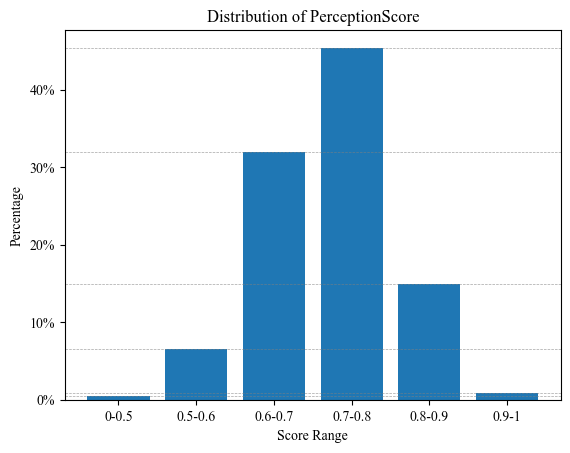

In [16]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# city = 'Beijing'
# city = 'Shanghai'
# city = 'Shenzhen'
city = 'Guangzhou'
a = json.load(open(f"./perceptionscore_{city}.json", "r"))


list_less_05 = []
count_0_5 = 0
count_0_6 = 0
count_0_7 = 0
count_0_8 = 0
count_0_9 = 0
count_1 = 0
for k,value in a.items():
    if value < 0.5:
        count_0_5 += 1
    elif 0.5 <= value < 0.6:
        count_0_6 += 1
    elif 0.6 <= value < 0.7:
        count_0_7 += 1
    elif 0.7 <= value < 0.8:
        count_0_8 += 1
    elif 0.8 <= value < 0.9:
        count_0_9 += 1
    elif value >= 0.9:
        count_1 += 1


# 绘制分布直方图
ranges = ['0-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1']
values = [count_0_5, count_0_6, count_0_7, count_0_8, count_0_9, count_1]

print(values)

# 计算总数以计算百分比
total = sum(values)
# percentages = [(v / total) * 100 for v in values]
percentages = [(v / total)  for v in values]
print(percentages)

plt.bar(ranges, percentages)
plt.xlabel('Score Range')
plt.ylabel('Percentage')  # 更改Y轴标签为百分比

plt.title('Distribution of PerceptionScore')
def to_percent(y, position):
    return f"{100 * y:.0f}%"
# 设置y轴格式化
formatter = FuncFormatter(to_percent)
# plt.gca().yaxis.set_major_formatter(formatter)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
# 为每个条形图添加百分比标签
# for i, (v, p) in enumerate(zip(values, percentages)):
#     plt.text(i, p, f'{p:.2f}%', ha='center')
for i, (v, p) in enumerate(zip(values, percentages)):
    # plt.text(i, p, f'{p:.2f}%', ha='center', va='bottom')  # 添加百分比文本
    ax.axhline(y=p, color='gray', linestyle='dashed', alpha=0.7, linewidth=0.5)  # 绘制虚线

# 保存图像
# plt.savefig(f'{city}/perceptioncore_distribution_{city}.jpg')
plt.show()  # 显示图像


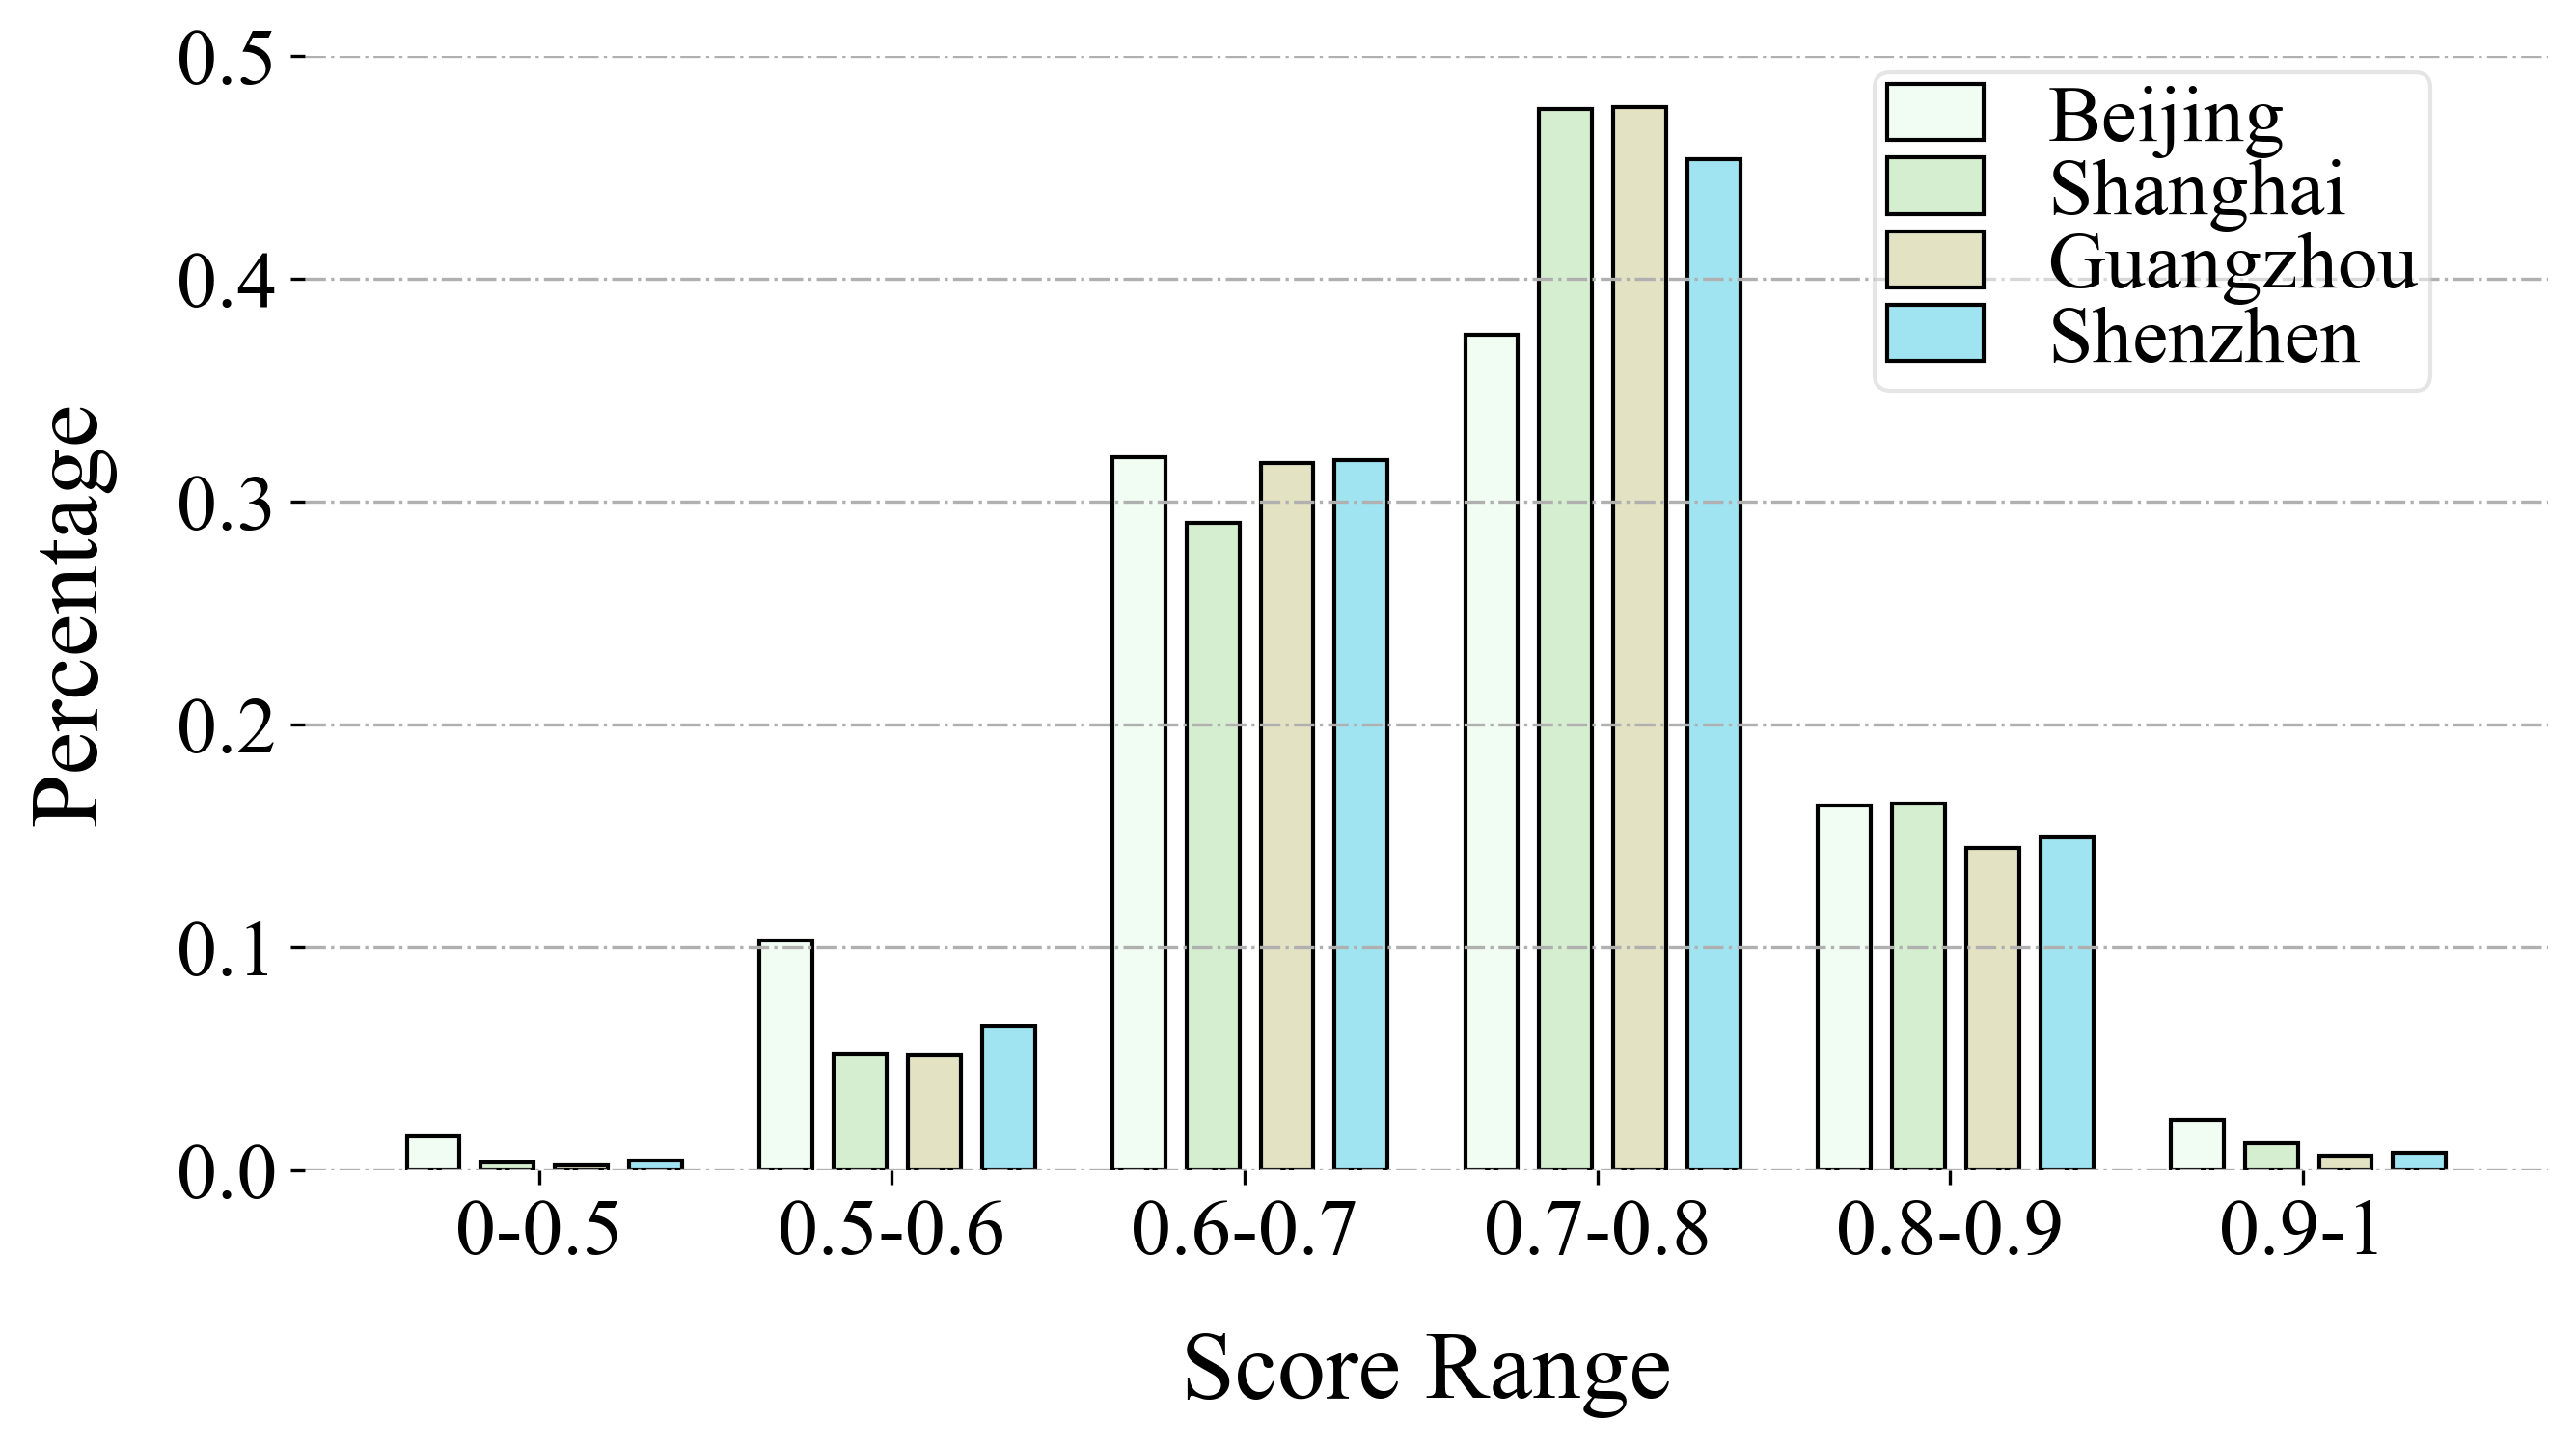

In [19]:
# x_name = ["0-50%","50-60%","60-70%","70-80%","80-90%","90-100%"] # 横轴
x_name = ['0-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1']
x = range(len(x_name))
x = [i-1 for i in x]

bj = np.array([0.015461733973453826, 0.10307822648969217, 0.32003671279299634, 0.3752471053374753, 0.16365433493363457, 0.02252188647274781])
sh = np.array([0.003714139344262295, 0.05206198770491803, 0.2905993852459016, 0.4764984631147541, 0.16470286885245902, 0.012423155737704918])
gz = np.array([0.0024589357725976198, 0.05163765122455002, 0.31739942952690076, 0.47732861217664996, 0.14468378085964395, 0.006491590439657716])
sz = np.array([0.004453176162409954, 0.06483300589390963, 0.3189259986902423, 0.45396201702685, 0.14970530451866404, 0.008120497707924034])

plt.figure(figsize=(10,5), dpi=300)
bwith = 0
# colors = ['#2F9D6B', '#8B30C2', '#3BBAE1']

ax = plt.gca() 
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
plt.grid(linestyle='-.',axis='y')
plt.bar(x, bj, width=0.15, label="Beijing", color='#f1fdf3', edgecolor='black')
plt.bar([i+0.21 for i in x], sh, width=0.15, label="Shanghai", color='#d5eecf', edgecolor='black')
plt.bar([i+0.42 for i in x], gz, width=0.15, label="Guangzhou", color='#e3e2c3', edgecolor='black')
plt.bar([i+0.63 for i in x], sz, width=0.15, label="Shenzhen", color='#a0e4f1', edgecolor='black')
plt.legend(fontsize=20, loc = [0.7,0.7], labelspacing=0, borderpad=0.15, framealpha=0.5, handlelength=1.2)
plt.xlabel("Score Range", fontsize=24, labelpad=15)
plt.ylabel("Percentage", fontsize=24, labelpad=15)
plt.ylim([0.0, 0.5])
plt.yticks(fontsize=20)
plt.xticks([i+0.3 for i in x], x_name, fontsize=20)
# for i, tick_label in enumerate(ax.get_xticklabels()):
#     tick_label.set_color(colors[i])



plt.savefig('distribution.pdf', dpi=800, bbox_inches='tight')
plt.show()